In [83]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Load Data

In [45]:
df = pd.read_csv('../1.Data/2.Clean/clean.csv')

In [46]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


replace yes with 1 and no with 0

In [47]:
df_y = df[df.y.isin(['yes'])].index

In [48]:
df.loc[df_y, 'y'] = 1

In [49]:
df_n = df[df.y.isin(['no'])].index

In [50]:
df.loc[df_n, 'y'] = 0

In [51]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Feature Exploration

## Overall Statistic

Let's calculate basic statistical features for all columns

In [52]:
for column in df.columns:
    print('Statistic for ', column)
    print(df[column].describe())
    print('---------------------')

Statistic for  age
count    30604.000000
mean        39.042021
std         10.341946
min         17.000000
25%         31.000000
50%         37.000000
75%         45.000000
max         95.000000
Name: age, dtype: float64
---------------------
Statistic for  job
count      30604
unique        12
top       admin.
freq        8737
Name: job, dtype: object
---------------------
Statistic for  marital
count       30604
unique          3
top       married
freq        17565
Name: marital, dtype: object
---------------------
Statistic for  education
count                 30604
unique                    7
top       university.degree
freq                  10450
Name: education, dtype: object
---------------------
Statistic for  default
count     30604
unique        2
top          no
freq      30601
Name: default, dtype: object
---------------------
Statistic for  housing
count     30604
unique        2
top         yes
freq      16577
Name: housing, dtype: object
---------------------
Statistic f

## Correlation between Features

In [53]:
correlation_matrix = df.corr()

In [54]:
correlation_matrix

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,0.007246,-0.001714,-0.051017,0.048681,-0.049864,-0.035059,0.125040,-0.036006,-0.064202
duration,0.007246,1.000000,-0.068146,-0.046091,0.018941,-0.022834,0.013335,-0.009972,-0.028489,-0.039813
campaign,-0.001714,-0.068146,1.000000,0.054466,-0.080916,0.157984,0.127693,-0.012209,0.141010,0.148248
pdays,-0.051017,-0.046091,0.054466,1.000000,-0.591054,0.269640,0.068509,-0.101980,0.295944,0.371468
previous,0.048681,0.018941,-0.080916,-0.591054,1.000000,-0.403942,-0.176838,-0.027428,-0.439157,-0.488675
emp_var_rate,-0.049864,-0.022834,0.157984,0.269640,-0.403942,1.000000,0.765979,0.156177,0.969405,0.900454
cons_price_idx,-0.035059,0.013335,0.127693,0.068509,-0.176838,0.765979,1.000000,0.026074,0.667203,0.488880
cons_conf_idx,0.125040,-0.009972,-0.012209,-0.101980,-0.027428,0.156177,0.026074,1.000000,0.242456,0.074105
euribor3m,-0.036006,-0.028489,0.141010,0.295944,-0.439157,0.969405,0.667203,0.242456,1.000000,0.944904
nr_employed,-0.064202,-0.039813,0.148248,0.371468,-0.488675,0.900454,0.488880,0.074105,0.944904,1.000000


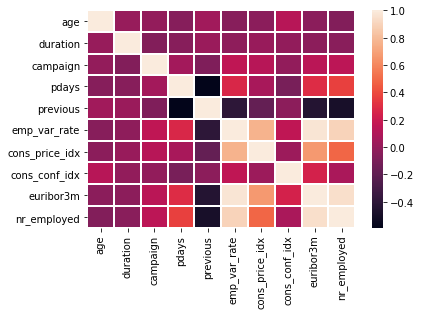

In [55]:
ax = sns.heatmap(correlation_matrix, linewidth=1)

## Relation between 'emp_var_rate' and 'euribor3m'

From the correlation matrix, we can see that there is a relatively high correlation between 'emp_var_rate' and 'euribor3m'

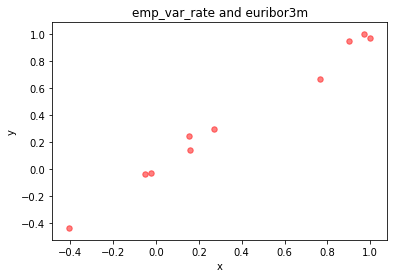

In [80]:
colors = ("red")
area = np.pi*3
plt.scatter(correlation_matrix.emp_var_rate, correlation_matrix.euribor3m, s=30, c=colors, alpha=0.5)
plt.title('emp_var_rate and euribor3m')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Relation between 'pdays' and 'previous'

From the correlation matrix, we can see that there is a high negative correlation between 'density' and 'fixed acidity'

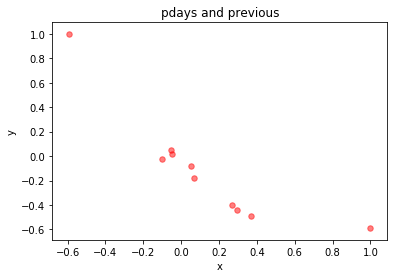

In [81]:
colors = ("red")
area = np.pi*3
plt.scatter(correlation_matrix.pdays, correlation_matrix.previous, s=30, c=colors, alpha=0.5)
plt.title('pdays and previous')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

From the correlation matrix, we can see that there is a high positive correlation between 'pdays' and 'previous'

In [58]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Distribution of 'age' 

Text(0, 0.5, 'Number of people')

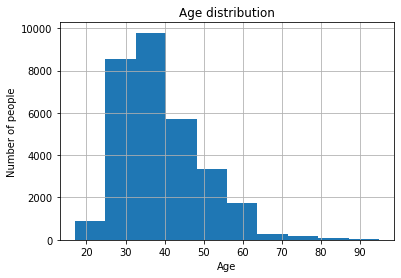

In [59]:
df.age.hist()
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')

In [60]:
df["y"] = pd.to_numeric(df["y"])

In [61]:
s2 = df.groupby(['month']).y.sum().reset_index()

In [62]:
s2

,month,y
0,apr,470
1,aug,535
2,dec,75
3,jul,516
4,jun,458
5,mar,246
6,may,701
7,nov,365
8,oct,288
9,sep,222


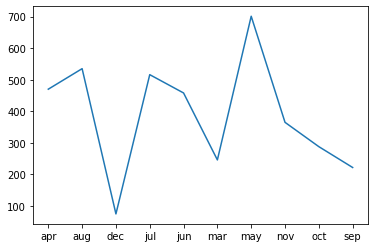

In [63]:
plt.plot(s2.month, s2.y)

# Train Model for Predicting Quality of Wine

Encoding categorical data

In [64]:
X = df.drop('y', axis=1)
y = df.y

categorical_columns = ["job","marital","education","default","housing","loan","contact","poutcome"]

**Create One Hot Encoding Features for the Categorical Variables**
**Set Datatype of Ordinal/Nominal Variables to Category

In [65]:
X = pd.get_dummies(X, drop_first=True)

In [66]:
X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


**divide the data into training and testing sets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling

In [68]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the Algorithm

In [69]:
regressor = RandomForestRegressor(n_estimators=20, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

**Evaluating the Algorithm

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12135272014376736
Mean Squared Error: 0.06551788923378533
Root Mean Squared Error: 0.2559646249656099


In [71]:
model=DecisionTreeClassifier()
scores = cross_validate(model, X, y, cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

## Evaluation

In [72]:
y_pred = regressor.predict(X_test)

In [73]:
y_pred

array([0.  , 0.  , 0.8 , ..., 0.55, 0.1 , 0.1 ])

In [74]:
mean_squared_error(y_test, y_pred)

0.06551788923378533

# Save and Load Model

## Save Model

In [75]:
pickle.dump(regressor, open('RandomForestRegressor.model', 'wb'))

## Load Model

In [76]:
loaded_regr = pickle.load(open('RandomForestRegressor.model', 'rb'))

## Use Loaded Model

In [77]:
sample = [ 9.6,  0.38,  0.4,  1.9,  0.07,  5, 13,  0.99659,  3.15,  0.7, 9.5]

In [78]:
loaded_regr.predict([sample])

ValueError: Number of features of the model must match the input. Model n_features is 48 and input n_features is 11 

In [79]:
df.y.mean()

0.1266501110965887